In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
%matplotlib inline

import sys
sys.path.append("/home/jonas/phd/NanoNets/src/")
sys.path.append("/mnt/c/Users/jonas/Desktop/phd/NanoNets/src/")

import nanonets_utils
import nanonets

def scale_landscape(arr):
    return np.round((arr - np.min(arr,axis=0))/(np.max(arr,axis=0)-np.min(arr,axis=0)),2)

def autocorrelation(x : np.array, y : np.array, lags : int):

    return [np.corrcoef(x, y)[0,1] if l==0 else np.corrcoef(x[:-l], y[l:])[0,1] for l in range(lags)]

In [3]:
R_vals          = [50,100,200,400,800,1600,3200,6400,12800]
stat            = "r3"
states          = {}
net_currents    = {}

results         = pd.DataFrame()
results["t"]    = np.loadtxt("1I_1O/time.csv")[1:]*10**9
results["U"]    = pd.read_csv(f"/home/jonas/phd/data/1I_1O_R/R_50/{stat}/Nx=7_Ny=7_Nz=1_Ne=2.csv")['E0']

for R_val in R_vals:

    results[f"I_R{R_val}"]      = pd.read_csv(f"/home/jonas/phd/data/1I_1O_R/R_{R_val}/{stat}/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
    results[f"uI_R{R_val}"]     = pd.read_csv(f"/home/jonas/phd/data/1I_1O_R/R_{R_val}/{stat}/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']
    states[f'R_{R_val}']        = pd.read_csv(f"/home/jonas/phd/data/1I_1O_R/R_{R_val}/{stat}/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv")
    net_currents[f'R_{R_val}']  = pd.read_csv(f"/home/jonas/phd/data/1I_1O_R/R_{R_val}/{stat}/net_currents_Nx=7_Ny=7_Nz=1_Ne=2.csv")

### Input - Output

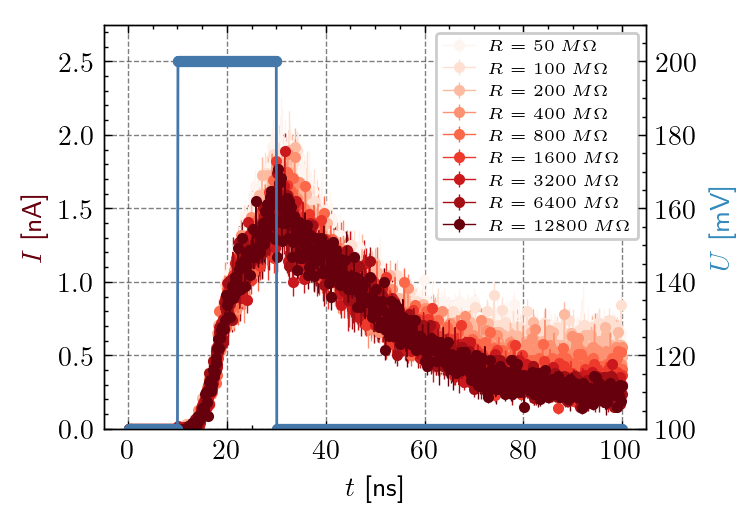

In [4]:
cmap    = plt.get_cmap('Reds')
R_vals  = [50,100,200,400,800,1600,3200,6400,12800]

with plt.style.context(["science", "bright", "grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    for i, R_val in enumerate(R_vals):

        ax.errorbar(results["t"], results[f'I_R{R_val}']/1000, results[f'uI_R{R_val}']/1000,
                    label=f'$R = {R_val}$ $M\Omega$', c=cmap(i/(len(R_vals)-1)), marker='.', markevery=2, lw=0.5)
        
    ax.legend(ncol=1, fontsize='xx-small')
    ax.set_xlabel("$t$ [ns]")
    ax.set_ylabel("$I$ [nA]", c=cmap(i/(len(R_vals)-1)))
    ax.set_ylim(0,2.75)

    ax2 = ax.twinx()
    ax2.plot(results["t"], results['U']*1000, marker='.')
    ax2.grid(False)
    ax2.set_ylabel("$U$ [mV]", c=nanonets_utils.blue_color)
    ax2.set_ylim(100,210)

### Input - State

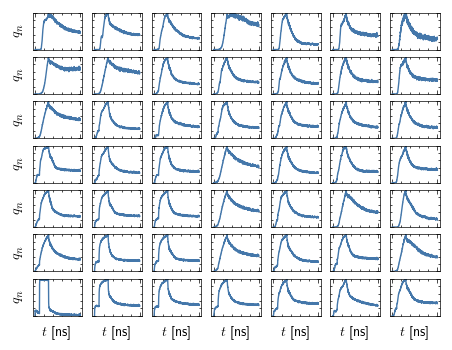

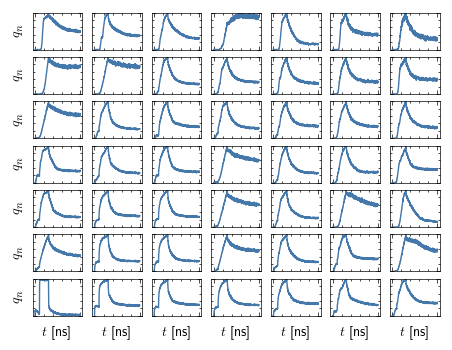

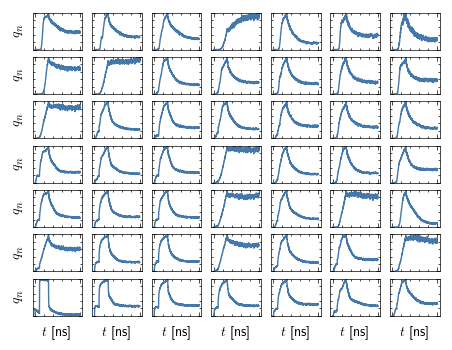

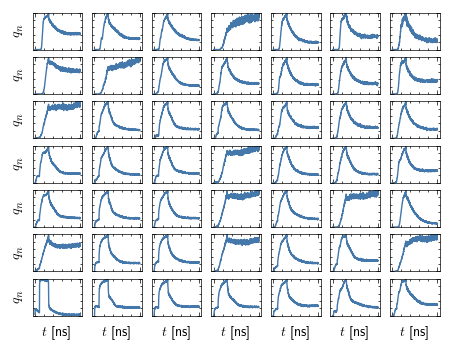

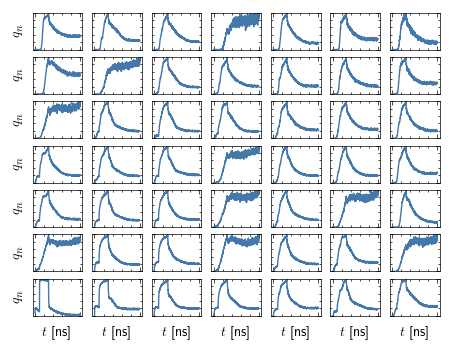

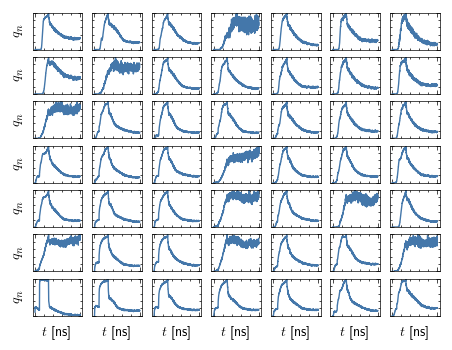

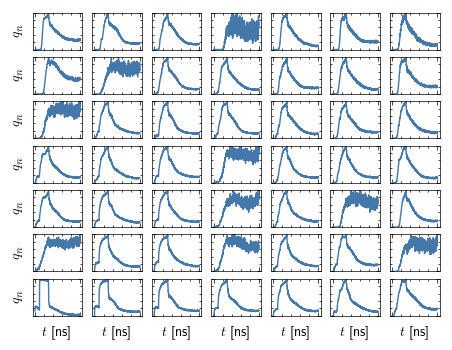

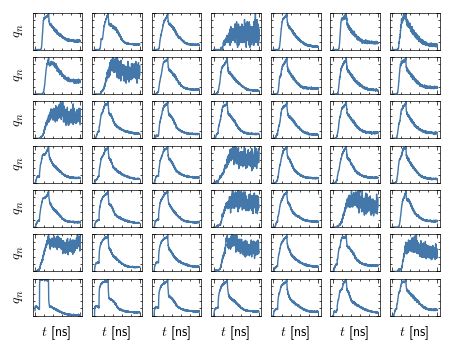

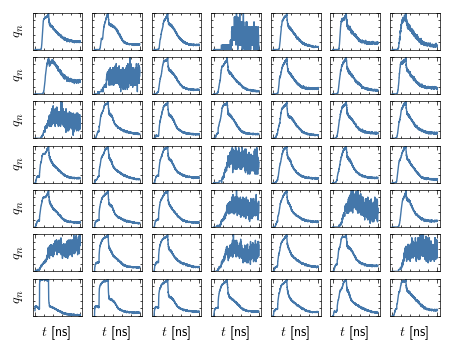

In [6]:
with plt.style.context(["science","bright"]):

    for key in states.keys():

        fig, axs = plt.subplots(ncols=7, nrows=7)
        fig.set_figwidth(fig.get_figwidth()*1.5)
        fig.set_figheight(fig.get_figheight()*1.5)

        i = 0

        for row in np.arange(6,-1,-1):
            for col in range(0,7):

                axs[row,col].plot(results["t"], scale_landscape(states[key][f"{i}"].values))
                axs[row,col].set_ylim(0,1)

                if i >= 7:
                    axs[row,col].set_xticklabels("")
                else:
                    axs[row,col].set_xlabel("$t$ [ns]")

                if i % 7 != 0:
                    axs[row,col].set_yticklabels("")
                else:
                    axs[row,col].set_ylabel("$q_n$")

                i += 1

                axs[row,col].set_yticklabels("")
                axs[row,col].set_xticklabels("")

        # fig.savefig(f'plots/state_vs_time/{key}.svg', bbox_inches='tight', transparent=True)
        # fig.savefig(f'plots/state_vs_time/{key}.pdf', bbox_inches='tight', transparent=False)

In [26]:
np_index    = np.arange(49)
t           = results["t"].values
x           = results["U"].values
n_lags      = 300

auto_vals   = {}

for key, val in states.items():
    np_vals = []
    for j, i in enumerate(np_index): 
        np_vals.append(np.round(t[np.argmax(autocorrelation(x,val[f"{i}"].values,n_lags))],2))
    auto_vals[key] = np_vals

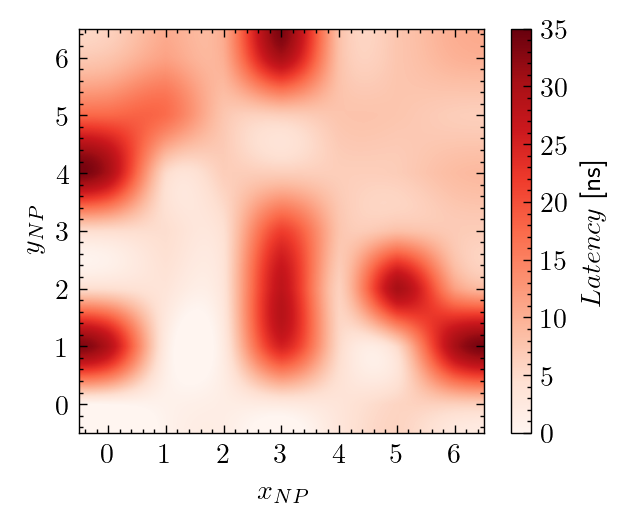

In [63]:
key = 'R_12800'

with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    im  = ax.imshow(np.array(auto_vals[key]).reshape(7,-1), cmap='Reds', origin='lower', vmin=0, vmax=35, interpolation='spline16')
    fig.colorbar(im, label='$Latency$ [ns]')
    ax.set_xticks(np.arange(0,7))
    ax.set_yticks(np.arange(0,7))
    ax.set_xlabel("$x_{NP}$")
    ax.set_ylabel("$y_{NP}$")

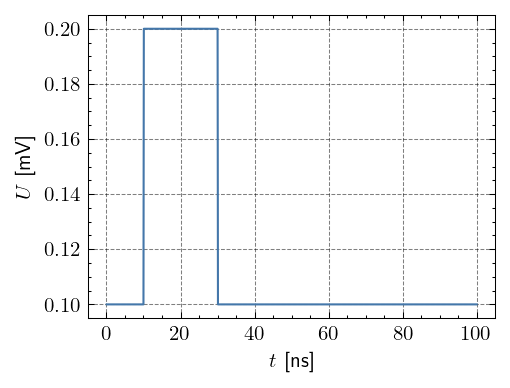

In [7]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=150)
    ax  = fig.add_subplot()
    ax.plot(results['t'], results['U'])
    ax.set_xlabel("$t$ [ns]")
    ax.set_ylabel("$U$ [mV]")
    fig.savefig("plots/input.svg", bbox_inches='tight', transparent=True)

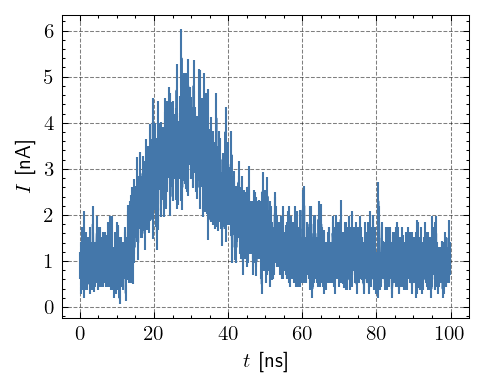

In [8]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=150)
    ax  = fig.add_subplot()
    ax.errorbar(results['t'], results['I']/1000, results['uI']/1000)
    ax.set_xlabel("$t$ [ns]")
    ax.set_ylabel("$I$ [nA]")
    fig.savefig("plots/output.svg", bbox_inches='tight', transparent=True)

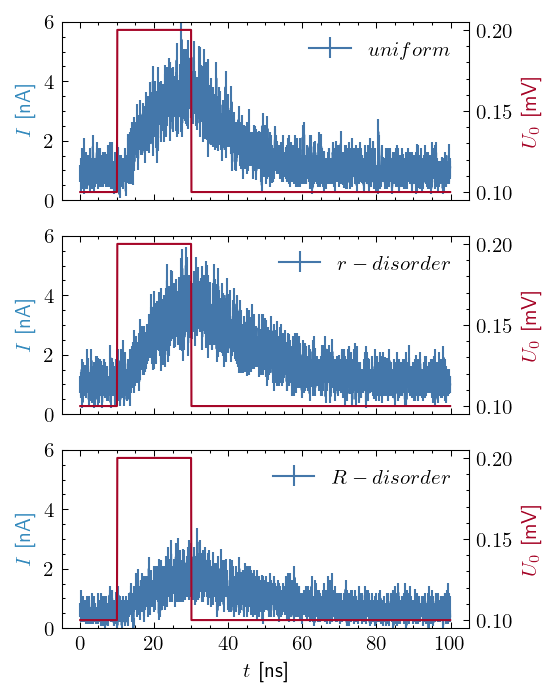

In [9]:
with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=150)
    fig.set_figheight(fig.get_figheight()*2.0)
    
    ax  = fig.add_subplot(3,1,1)
    ax2 = ax.twinx()
    ax2.plot(results['t'], results['U'], c='#A60628')
    ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
    ax.errorbar(results['t'], results['I']/1000, results['uI']/1000, label='$uniform$')
    ax.set_xticklabels("")
    ax.set_ylim(0,6)
    ax.set_ylabel("$I$ [nA]", c='#348ABD')
    ax.legend()

    ax  = fig.add_subplot(3,1,2)
    ax2 = ax.twinx()
    ax2.plot(results['t'], results['U'], c='#A60628')
    ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
    ax.errorbar(results['t'], results['r_40_I']/1000, results['r_40_uI']/1000, label='$r-disorder$')
    ax.set_xticklabels("")
    ax.set_ylim(0,6)
    ax.set_ylabel("$I$ [nA]", c='#348ABD')
    ax.legend()

    ax  = fig.add_subplot(3,1,3)
    ax2 = ax.twinx()
    ax2.plot(results['t'], results['U'], c='#A60628')
    ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
    ax.errorbar(results['t'], results['R_100_I']/1000, results['R_100_uI']/1000, label='$R-disorder$')
    ax.set_ylabel("$I$ [nA]", c='#348ABD')
    ax.set_ylim(0,6)
    ax.set_xlabel("$t$ [ns]")
    ax.legend()

    fig.savefig('plots/i_o_comp_R_and_r.svg', bbox_inches='tight', transparent=True)
    fig.savefig('plots/i_o_comp_R_and_r.pdf', bbox_inches='tight', transparent=False)

### Input - Output Response

In [ ]:
# with plt.style.context(["science","bright"]):

#     fig = plt.figure(dpi=200)
#     fig.set_figwidth(fig.get_figwidth()*2)
#     ax  = fig.add_subplot(1,2,1)
#     ax  = sns.histplot(np.abs(np.random.normal(25,5,100000)), bins=50, stat='density')
#     ax.set_xlabel("$R$ [$M\Omega$]")
#     ax.set_title('$R-disorder$')

#     ax  = fig.add_subplot(1,2,2)
#     ax  = sns.histplot(np.abs(np.random.normal(10,2,100000)), bins=50, stat='density')
#     ax.set_xlabel("$r$ [$nm$]")
#     ax.set_ylabel("")
#     ax.set_title('$r-disorder$')

#     fig.savefig('plots/r_and_R_hists.svg', bbox_inches='tight', transparent=True)
#     fig.savefig('plots/r_and_R_hists.pdf', bbox_inches='tight', transparent=False)

In [ ]:
# with plt.style.context(["science","bright"]):

#     fig = plt.figure(dpi=200)
#     fig.set_figheight(fig.get_figheight())
    
#     ax  = fig.add_subplot(3,1,1)
#     ax2 = ax.twinx()
#     ax2.plot(results['t'], results['U'], c='#A60628')
#     ax2.set_ylabel("$U_0$ [mV]", c='#A60628')

#     ax.errorbar(results['t'], results['I']/1000, results['uI']/1000, label='$uniform$')
#     ax.set_xticklabels("")
#     ax.set_ylabel("$I$ [nA]", c='#348ABD')
#     ax.set_ylim(0,6)
#     ax.legend()

#     ax  = fig.add_subplot(3,1,2)
#     ax2 = ax.twinx()
#     ax2.plot(results['t'], results['U'], c='#A60628')
#     ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
#     ax.errorbar(results['t'], results['r_I']/1000, results['r_uI']/1000, label='$r-disorder$')
#     ax.set_xticklabels("")
#     ax.set_ylabel("$I$ [nA]", c='#348ABD')
#     ax.set_ylim(0,6)
#     ax.legend()

#     ax  = fig.add_subplot(3,1,3)
#     ax2 = ax.twinx()
#     ax2.plot(results['t'], results['U'], c='#A60628')
#     ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
#     ax.errorbar(results['t'], results['R_I']/1000, results['R_uI']/1000, label='$R-disorder$')
#     ax.set_ylabel("$I$ [nA]", c='#348ABD')
#     ax.set_xlabel("$t$ [ns]")
#     ax.set_ylim(0,6)
#     ax.legend()

#     fig.savefig('plots/i_o_comp.svg', bbox_inches='tight', transparent=True)
#     fig.savefig('plots/i_o_comp.pdf', bbox_inches='tight', transparent=False)

In [11]:
# with plt.style.context(["science","bright"]):

#     fig = plt.figure(dpi=150)
    
#     ax  = fig.add_subplot()
#     ax2 = ax.twinx()
#     ax2.plot(results['t'], results['U'], c='#A60628')
#     ax2.set_ylabel("$U_0$ [mV]", c='#A60628')

#     ax.errorbar(results['t'], results['hr_I']/1000, results['hr_uI']/1000, label='uniform')
#     ax.set_xlabel("$t$ [ns]")
#     ax.set_ylabel("$I$ [nA]", c='#348ABD')
#     ax.set_ylim(0,10)

#     fig.savefig('plots/i_o_comp_high_radius.svg', bbox_inches='tight', transparent=True)
#     fig.savefig('plots/i_o_comp_high_radius.pdf', bbox_inches='tight', transparent=False)

### Animations

In [172]:
dic = {
    "standard"  : pd.read_csv("1I_1O/data/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv"),
    "r_5"       : pd.read_csv(f"1I_1O_radius_dis/data/r_5/{stat}/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv"),
    "r_20"      : pd.read_csv(f"1I_1O_radius_dis/data/r_20/{stat}/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv"),
    "r_40"      : pd.read_csv(f"1I_1O_radius_dis/data/r_40/{stat}/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv"),
    "R_50"      : pd.read_csv(f"1I_1O_R_dis/data/R_50/{stat}/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv"),
    "R_100"     : pd.read_csv(f"1I_1O_R_dis/data/R_100/{stat}/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv"),
    "R_200"     : pd.read_csv(f"1I_1O_R_dis/data/R_200/{stat}/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv"),
    "R_400"     : pd.read_csv(f"1I_1O_R_dis/data/R_400/{stat}/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv")
}

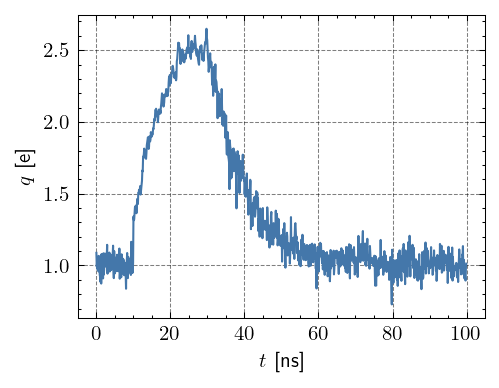

In [50]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=150)
    ax  = fig.add_subplot()
    ax.plot(results['t'], dic["standard"].loc[:,"24"])
    ax.set_xlabel("$t$ [ns]")
    ax.set_ylabel("$q$ [e]")
    fig.savefig("plots/state_example_t.svg", bbox_inches='tight', transparent=True)

MovieWriter ffmpeg unavailable; using Pillow instead.


KeyboardInterrupt: 

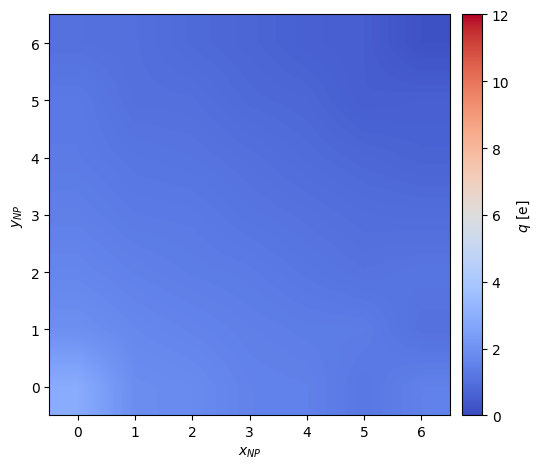

In [17]:
for key, val in dic.items():

    ani = nanonets_utils.animate_landscape(val.values, 7 , 7, delay_between_frames=50, interpolation='bilinear',
                                           cbar_label='$q$ [e]', vmin=0, vmax=12)
    ani.save(f"plots/animations/state_animation_{key}.gif")

In [22]:
def scale_landscape(arr):
    return np.round((arr - np.min(arr,axis=0))/(np.max(arr,axis=0)-np.min(arr,axis=0)),2)

In [ ]:
for key, val in dic.items():

    ani = nanonets_utils.animate_landscape(scale_landscape(val.values), 7 , 7, delay_between_frames=50, interpolation='bilinear',
                                           cbar_label='$q_n$', vmin=0, vmax=1)
    ani.save(f"plots/animations/state_animation_scaled_{key}.gif")

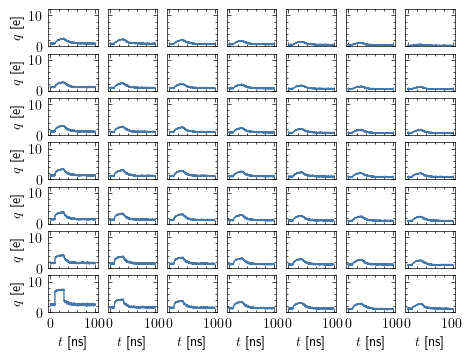

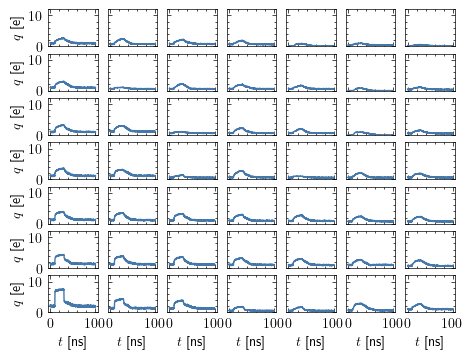

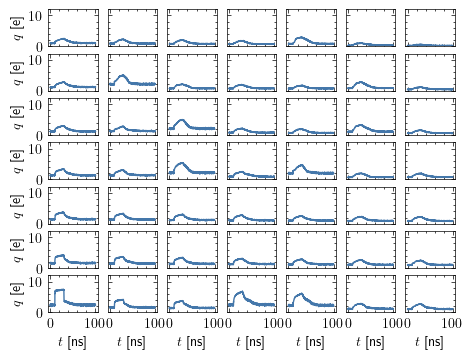

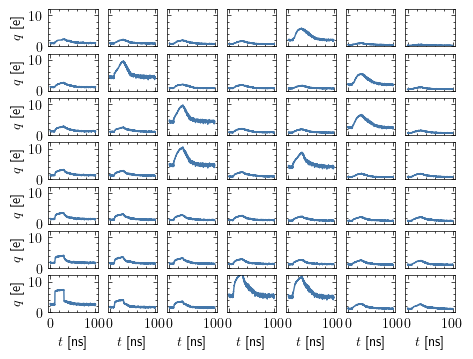

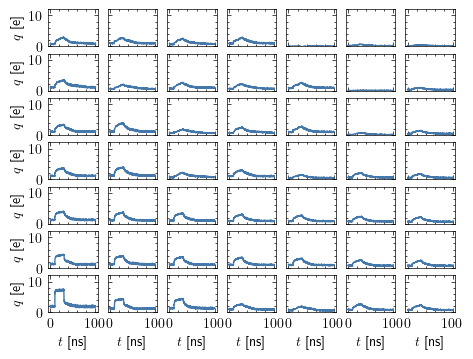

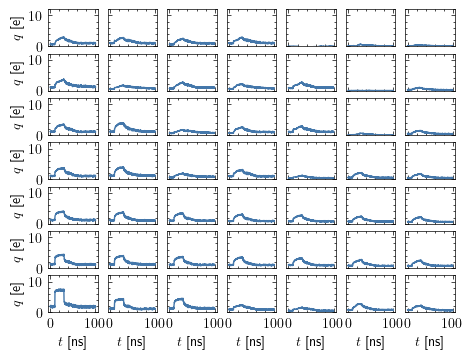

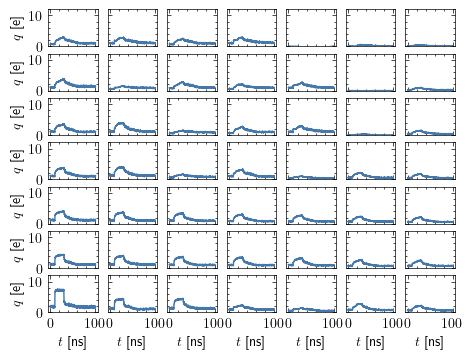

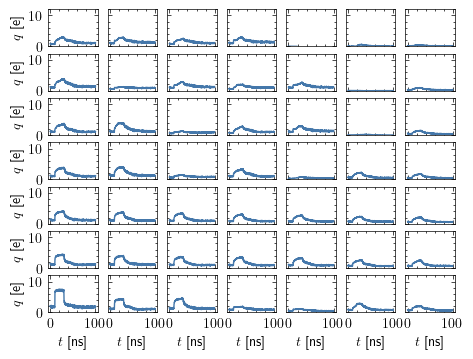

In [18]:
with plt.style.context(["science","bright"]):

    for key in dic.keys():

        fig, axs = plt.subplots(ncols=7, nrows=7)
        fig.set_figwidth(fig.get_figwidth()*1.5)
        fig.set_figheight(fig.get_figheight()*1.5)

        i = 0

        for row in np.arange(6,-1,-1):
            for col in range(0,7):

                axs[row,col].plot(results["t"], dic[key][f"{i}"].values)
                axs[row,col].set_ylim(0,12)

                if i >= 7:
                    axs[row,col].set_xticklabels("")
                else:
                    axs[row,col].set_xlabel("$t$ [ns]")

                if i % 7 != 0:
                    axs[row,col].set_yticklabels("")
                else:
                    axs[row,col].set_ylabel("$q$ [e]")

                i += 1

        fig.savefig(f'plots/state_vs_time/{key}.svg', bbox_inches='tight', transparent=True)
        fig.savefig(f'plots/state_vs_time/{key}.pdf', bbox_inches='tight', transparent=False)

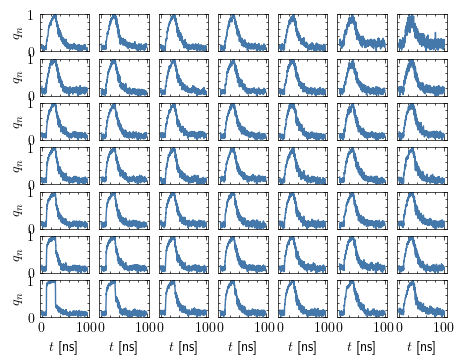

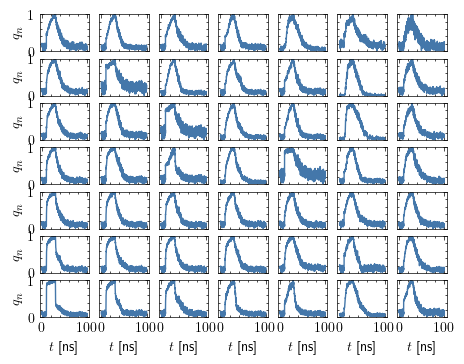

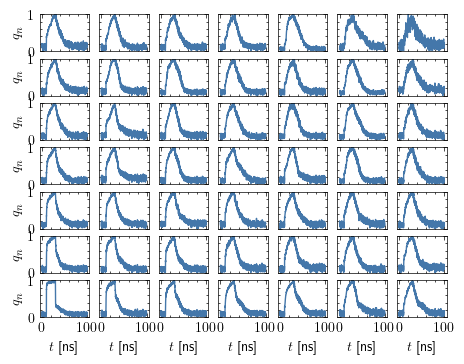

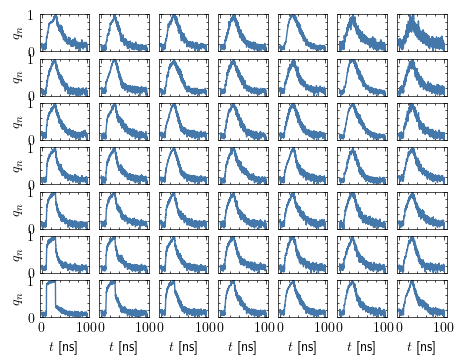

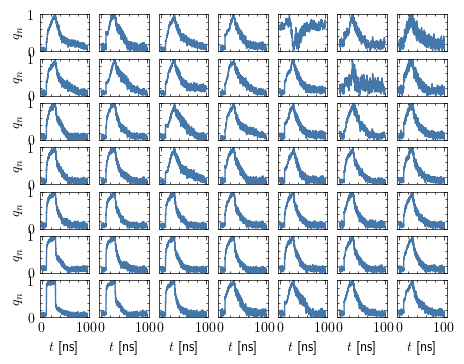

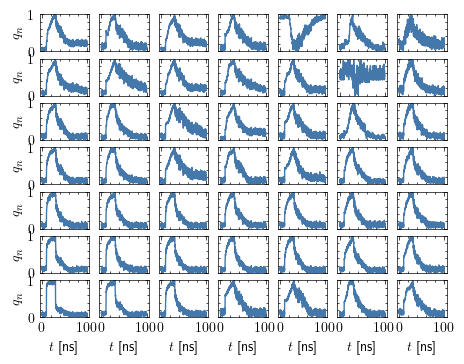

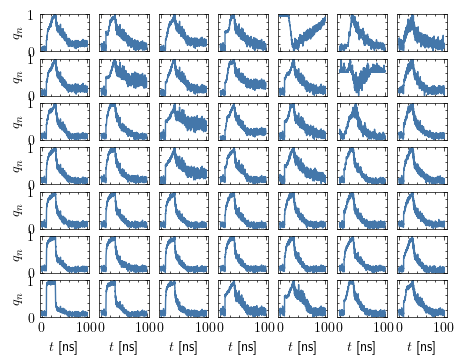

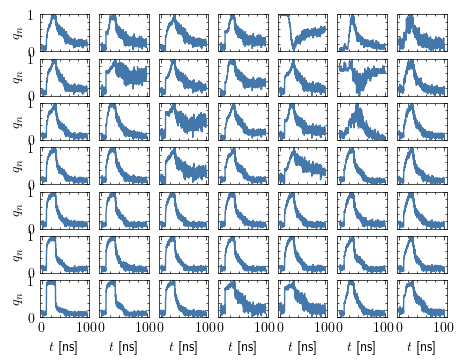

In [23]:
with plt.style.context(["science","bright"]):

    for key in dic.keys():

        fig, axs = plt.subplots(ncols=7, nrows=7)
        fig.set_figwidth(fig.get_figwidth()*1.5)
        fig.set_figheight(fig.get_figheight()*1.5)

        i = 0

        for row in np.arange(6,-1,-1):
            for col in range(0,7):

                axs[row,col].plot(results["t"], scale_landscape(dic[key][f"{i}"]).values)
                axs[row,col].set_ylim(0,1)

                if i >= 7:
                    axs[row,col].set_xticklabels("")
                else:
                    axs[row,col].set_xlabel("$t$ [ns]")

                if i % 7 != 0:
                    axs[row,col].set_yticklabels("")
                else:
                    axs[row,col].set_ylabel("$q_n$")

                i += 1

        fig.savefig(f'plots/state_vs_time/scaled_{key}.svg', bbox_inches='tight', transparent=True)
        fig.savefig(f'plots/state_vs_time/scaled_{key}.pdf', bbox_inches='tight', transparent=False)

In [24]:
# Example: Cubic Network
network_topology = "cubic"

# Network Parameter
topology_parameter = {
    "Nx"    : 7,
    "Ny"    : 7,
    "Nz"    : 1,
    "e_pos" : [[0,0,0],[6,6,0]]
}

# Network Class Object
np_network_cubic = nanonets.simulation(network_topology=network_topology, topology_parameter=topology_parameter)

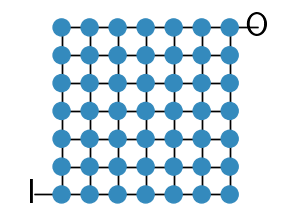

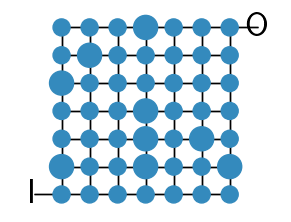

In [155]:
node_size = 150

fig, ax = nanonets_utils.display_network(np_network_sim=np_network_cubic, node_size=node_size, provide_electrode_labels=["I","O"], font_size=25)
fig.savefig('plots/network_plot.svg', bbox_inches='tight', transparent=True)
fig.savefig('plots/network_plot.pdf', bbox_inches='tight', transparent=False)

node_size   = np.repeat(150, 51)
rs          = np.random.RandomState(3)

for i in rs.choice(np.arange(1,48), 9, replace=False):
    node_size[i] = 300

fig, ax = nanonets_utils.display_network(np_network_sim=np_network_cubic, node_size=node_size, provide_electrode_labels=["I","O"], font_size=25)
fig.savefig('plots/network_plot_island_3.svg', bbox_inches='tight', transparent=True)
fig.savefig('plots/network_plot_island_3.pdf', bbox_inches='tight', transparent=False)

In [29]:
def autocorrelation(x : np.array, y : np.array, lags : int):

    return [np.corrcoef(x, y)[0,1] if l==0 else np.corrcoef(x[:-l], y[l:])[0,1] for l in range(lags)]

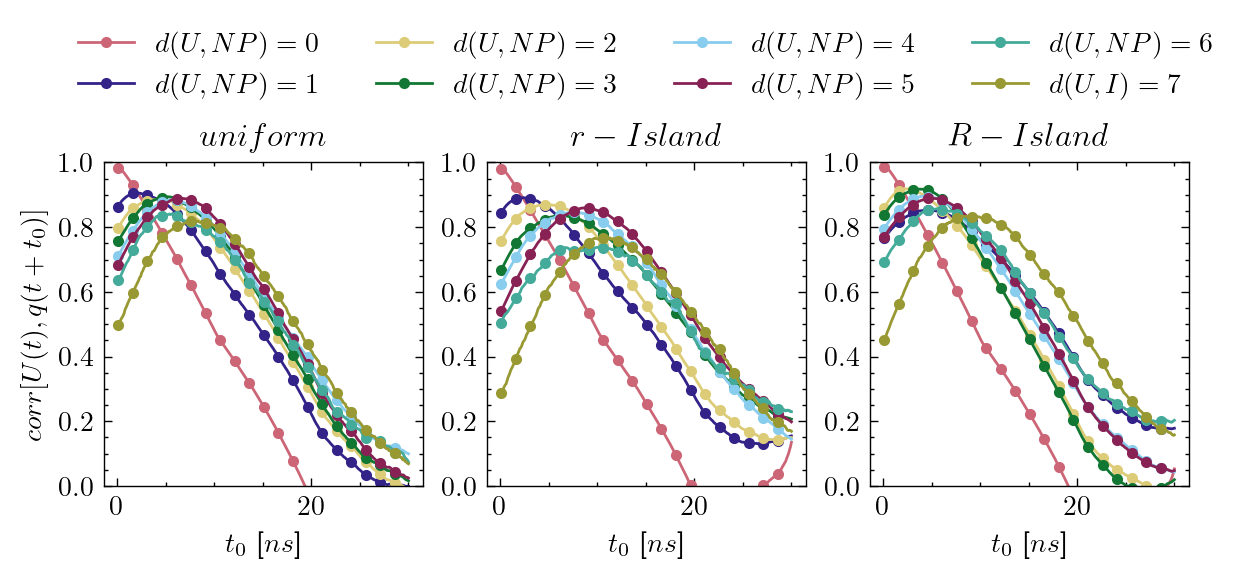

In [59]:
np_index    = [0,8,16,24,32,40,48]
t           = results["t"].values
x           = results["U"].values
n_lags      = 300

with plt.style.context(["science","muted"]):

    fig = plt.figure(dpi=200)
    fig.set_figwidth(fig.get_figwidth()*2)
    fig.set_figheight(fig.get_figheight()*0.8)
    ax1 = fig.add_subplot(1,3,1)
    ax2 = fig.add_subplot(1,3,2)
    ax3 = fig.add_subplot(1,3,3)

    for j, i in enumerate(np_index):

        ax1.plot(t[:n_lags], autocorrelation(x,dic["standard"][f"{i}"].values,n_lags), '.-', markevery=15)
        ax2.plot(t[:n_lags], autocorrelation(x,dic["r_40"][f"{i}"].values,n_lags), '.-', markevery=15, label=f"$d(U,NP) = {j}$")
        ax3.plot(t[:n_lags], autocorrelation(x,dic["R_100"][f"{i}"].values,n_lags), '.-', markevery=15)

    ax1.plot(t[:n_lags], autocorrelation(x,results["I"],n_lags), '.-', markevery=15)
    ax2.plot(t[:n_lags], autocorrelation(x,results["r_40_I"],n_lags), '.-', markevery=15, label=f"$d(U,I) = 7$")
    ax3.plot(t[:n_lags], autocorrelation(x,results["R_100_I"],n_lags), '.-', markevery=15)

    ax1.set_ylabel("$corr[U(t),q(t+t_0)]$")
    ax1.set_xlabel("$t_0$ [$ns$]")
    ax2.set_xlabel("$t_0$ [$ns$]")
    ax3.set_xlabel("$t_0$ [$ns$]")

    ax1.set_ylim(0,1)
    ax2.set_ylim(0,1)
    ax3.set_ylim(0,1)

    ax1.set_title("$uniform$")
    ax2.set_title("$r-Island$")
    ax3.set_title("$R-Island$")

    ax2.legend(ncol=4, bbox_to_anchor=(0.5,1.30), loc='center')

    # fig.savefig('plots/state_vs_input_corr.svg', bbox_inches='tight', transparent=True)
    # fig.savefig('plots/state_vs_input_corr.pdf', bbox_inches='tight', transparent=False)

In [173]:
def get_distance(arr):
    
    xval    = arr//7
    yval    = arr%7
    d       = np.sqrt(xval**2 + yval**2)

    return d

In [174]:
np_index    = np.arange(49)#[0,8,16,24,32,40,48]
t           = results["t"].values
x           = results["U"].values
n_lags      = 300

auto_vals   = []

for key, val in dic.items():
    np_vals = []
    for j, i in enumerate(np_index): 
        np_vals.append(np.round(t[np.argmax(autocorrelation(x,val[f"{i}"].values,n_lags))],2))
    auto_vals.append(np_vals)

In [175]:
distances       = get_distance(np_index)
auto_df         = pd.DataFrame(auto_vals).T
auto_df[8]      = np.round(distances,1)
auto_df

,0,1,2,3,4,5,6,7,8
0,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.0
1,1.1,0.9,1.1,1.3,0.5,0.7,0.9,0.7,1.0
2,2.3,2.1,2.5,3.1,1.4,1.4,1.2,1.3,2.0
3,3.7,2.9,3.2,4.5,2.2,2.5,2.2,2.3,3.0
4,4.8,3.5,4.5,4.8,3.1,2.7,2.5,2.5,4.0
5,4.7,4.5,5.6,9.0,4.1,4.3,5.4,4.3,5.0
6,5.9,6.7,7.1,7.2,5.4,4.9,5.5,5.8,6.0
7,0.9,0.9,1.2,1.7,7.0,7.7,8.9,7.1,1.0
8,2.1,2.1,2.4,2.8,1.8,1.7,2.2,2.3,1.4
9,3.1,2.1,3.6,4.8,2.2,2.5,2.2,1.9,2.2


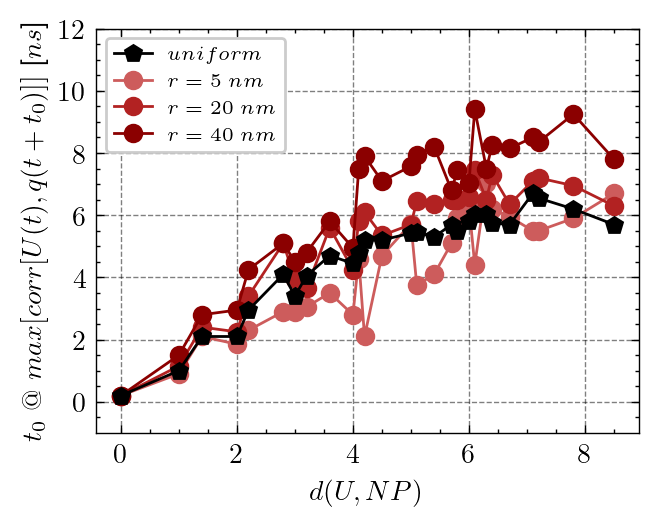

In [176]:
labels  = ['$uniform$', '$r = 5$ $nm$', '$r = 20$ $nm$', '$r = 40$ $nm$', '$R = 50$ $M\Omega$', '$R = 100$ $M\Omega$', '$R = 200$ $M\Omega$', '$R = 400$ $M\Omega$', '$R = 800$ $M\Omega$']
colors  = ['black','indianred','firebrick', 'darkred', 'lightsteelblue', 'cornflowerblue', 'royalblue', 'mediumblue', 'darkblue']
markers = ['p','o','o','o','s','s','s','s','s']
# ls      = ['solid','dashed','dashed','dashed','dotted','dotted','dotted','dotted','dotted']

with plt.style.context(["science","muted","grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    for col in [0,1,2,3]:
        test = auto_df[[col,8]].groupby(by=8).mean().reset_index()

        if col == 0:
            ax.plot(test[8], test[col], label=labels[col], c=colors[col], marker=markers[col], zorder=3)
        else:
            ax.plot(test[8], test[col], label=labels[col], c=colors[col], marker=markers[col])

        # ax.plot(auto_df[7], auto_df[col], label=labels[col], c=colors[col], marker=markers[col])
    
    ax.set_ylabel("$t_0$ $@$ $max[corr[U(t),q(t+t_0)]]$ [$ns$]") 
    ax.set_xlabel("$d(U,NP)$")
    # ax.set_xticks(np.arange(len(vals)))
    ax.legend(ncol=1, fontsize='x-small', loc='upper left')#, bbox_to_anchor=(0.5,1.15))
    ax.set_ylim(-1,12)
    
    fig.savefig('plots/state_vs_input_corr_max_r_3.svg', bbox_inches='tight', transparent=True)
    fig.savefig('plots/state_vs_input_corr_max_r_3.pdf', bbox_inches='tight', transparent=False)

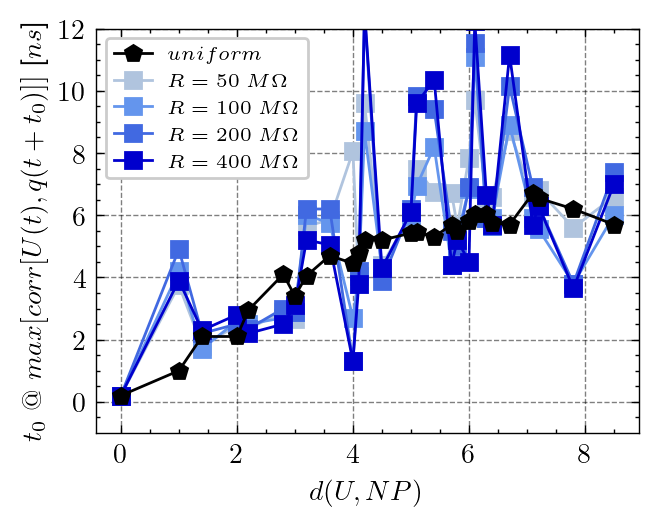

In [177]:
labels  = ['$uniform$', '$r = 5$ $nm$', '$r = 20$ $nm$', '$r = 40$ $nm$', '$R = 50$ $M\Omega$', '$R = 100$ $M\Omega$', '$R = 200$ $M\Omega$', '$R = 400$ $M\Omega$', '$R = 800$ $M\Omega$']
colors  = ['black','indianred','firebrick', 'darkred', 'lightsteelblue', 'cornflowerblue', 'royalblue', 'mediumblue', 'darkblue']
markers = ['p','o','o','o','s','s','s','s','s']
# ls      = ['solid','dashed','dashed','dashed','dotted','dotted','dotted','dotted','dotted']

with plt.style.context(["science","muted","grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    for col in [0,4,5,6,7]:
        
        test = auto_df[[col,8]].groupby(by=8).mean().reset_index()

        if col == 0:
            ax.plot(test[8], test[col], label=labels[col], c=colors[col], marker=markers[col], zorder=10)
        else:
            ax.plot(test[8], test[col], label=labels[col], c=colors[col], marker=markers[col])

        # ax.plot(auto_df[8], auto_df[col], label=labels[col], c=colors[col], marker=markers[col])
    
    ax.set_ylabel("$t_0$ $@$ $max[corr[U(t),q(t+t_0)]]$ [$ns$]") 
    ax.set_xlabel("$d(U,NP)$")
    ax.set_ylim(-1,12)
    # ax.set_xticks(np.arange(len(vals)))
    ax.legend(ncol=1, fontsize='x-small', loc='upper left')#, bbox_to_anchor=(0.5,1.15))
    
    fig.savefig('plots/state_vs_input_corr_max_Re_3.svg', bbox_inches='tight', transparent=True)
    fig.savefig('plots/state_vs_input_corr_max_Re_3.pdf', bbox_inches='tight', transparent=False)

In [178]:
auto_df_diff = auto_df.copy()

for col in range(1,8):
    auto_df_diff[col] = auto_df_diff[col] - auto_df_diff[0]

auto_df_diff

,0,1,2,3,4,5,6,7,8
0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.1,-0.2,0.0,0.2,-0.6,-0.4,-0.2,-0.4,1.0
2,2.3,-0.2,0.2,0.8,-0.9,-0.9,-1.1,-1.0,2.0
3,3.7,-0.8,-0.5,0.8,-1.5,-1.2,-1.5,-1.4,3.0
4,4.8,-1.3,-0.3,0.0,-1.7,-2.1,-2.3,-2.3,4.0
5,4.7,-0.2,0.9,4.3,-0.6,-0.4,0.7,-0.4,5.0
6,5.9,0.8,1.2,1.3,-0.5,-1.0,-0.4,-0.1,6.0
7,0.9,0.0,0.3,0.8,6.1,6.8,8.0,6.2,1.0
8,2.1,0.0,0.3,0.7,-0.3,-0.4,0.1,0.2,1.4
9,3.1,-1.0,0.5,1.7,-0.9,-0.6,-0.9,-1.2,2.2


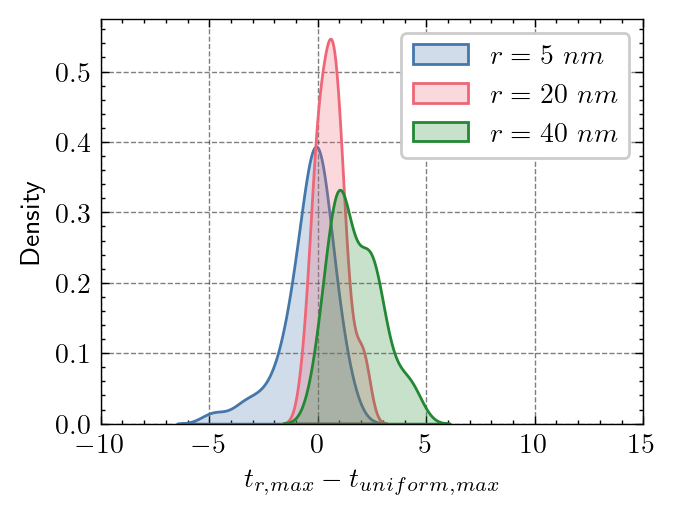

In [179]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    ax  = sns.kdeplot(auto_df_diff, x=1, fill=True, label=labels[1])#, color=colors[1])
    ax  = sns.kdeplot(auto_df_diff, x=2, fill=True, label=labels[2])
    ax  = sns.kdeplot(auto_df_diff, x=3, fill=True, label=labels[3])
    ax.legend(loc='upper right')
    ax.set_xlim(-10,15)
    ax.set_xlabel("$t_{r,max} - t_{uniform,max}$")
    fig.savefig('plots/state_vs_input_corr_dist_r_3.svg', bbox_inches='tight', transparent=True)
    fig.savefig('plots/state_vs_input_corr_dist_r_3.pdf', bbox_inches='tight', transparent=False)

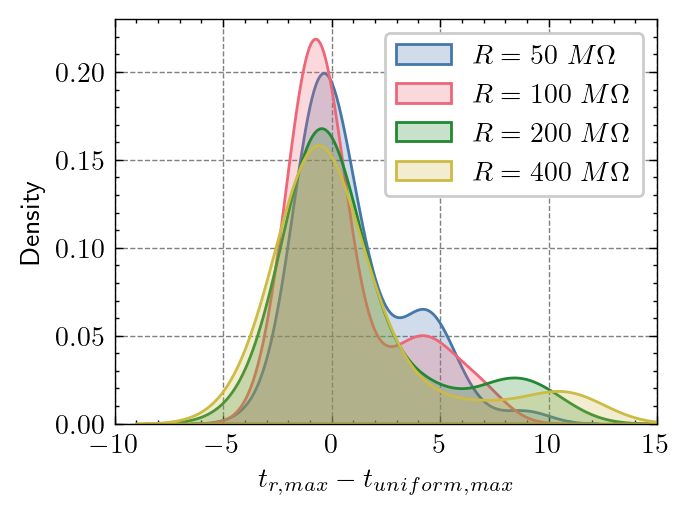

In [180]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    ax  = sns.kdeplot(auto_df_diff, x=4, fill=True, label=labels[4])#, color=colors[1])
    ax  = sns.kdeplot(auto_df_diff, x=5, fill=True, label=labels[5])
    ax  = sns.kdeplot(auto_df_diff, x=6, fill=True, label=labels[6])
    ax  = sns.kdeplot(auto_df_diff, x=7, fill=True, label=labels[7])
    ax.legend(loc='upper right')
    ax.set_xlim(-10,15)
    ax.set_xlabel("$t_{r,max} - t_{uniform,max}$")
    fig.savefig('plots/state_vs_input_corr_dist_Re_3.svg', bbox_inches='tight', transparent=True)
    fig.savefig('plots/state_vs_input_corr_dist_Re_3.pdf', bbox_inches='tight', transparent=False)

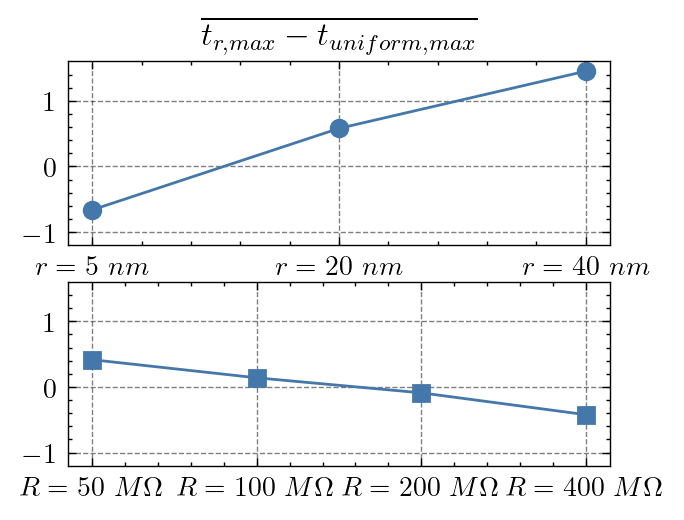

In [144]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot(2,1,1)
    ax.plot(labels[1:4], auto_df_diff.iloc[:,1:4].mean(), '-o')
    ax.set_title("$\\overline{t_{r,max} - t_{uniform,max}}$")
    ax.set_ylim(-1.2,1.6)

    ax  = fig.add_subplot(2,1,2)
    ax.plot(labels[4:-1], auto_df_diff.iloc[:,4:8].mean(), '-s')
    ax.set_ylim(-1.2,1.6)
    fig.savefig('plots/state_vs_input_corr_means.svg', bbox_inches='tight', transparent=True)
    fig.savefig('plots/state_vs_input_corr_means.pdf', bbox_inches='tight', transparent=False)

In [ ]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    ax  = sns.kdeplot(auto_df_diff, x=0, fill=True, color=colors[1], label=labels[1])
    ax  = sns.kdeplot(auto_df_diff, x=1, fill=True, color=colors[2], label=labels[2])
    ax  = sns.kdeplot(auto_df_diff, x=2, fill=True, color=colors[3], label=labels[3])
    ax.legend(loc='upper left')

<Axes: ylabel='Density'>

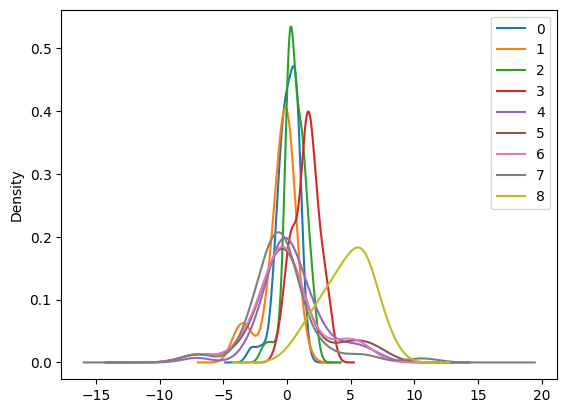

In [57]:
auto_df_diff.plot(kind='kde')

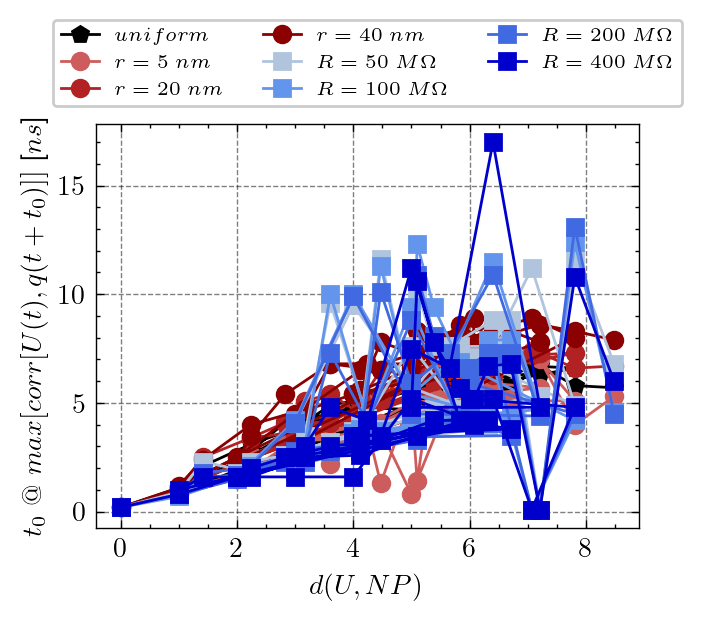

In [52]:
labels  = ['$uniform$', '$r = 5$ $nm$', '$r = 20$ $nm$', '$r = 40$ $nm$', '$R = 50$ $M\Omega$', '$R = 100$ $M\Omega$', '$R = 200$ $M\Omega$', '$R = 400$ $M\Omega$', '$R = 800$ $M\Omega$']
colors  = ['black','indianred','firebrick', 'darkred', 'lightsteelblue', 'cornflowerblue', 'royalblue', 'mediumblue', 'darkblue']
markers = ['p','o','o','o','s','s','s','s','s']
# ls      = ['solid','dashed','dashed','dashed','dotted','dotted','dotted','dotted','dotted']

with plt.style.context(["science","muted","grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    for i, vals in enumerate(auto_vals):

        ax.plot(distances, vals, label=labels[i], c=colors[i], marker=markers[i])   

    ax.set_ylabel("$t_0$ $@$ $max[corr[U(t),q(t+t_0)]]$ [$ns$]") 
    ax.set_xlabel("$d(U,NP)$")
    # ax.set_xticks(np.arange(len(vals)))
    ax.legend(ncol=3, fontsize='x-small', loc='center', bbox_to_anchor=(0.5,1.15))
    
    # fig.savefig('plots/state_vs_input_corr_max.svg', bbox_inches='tight', transparent=True)
    # fig.savefig('plots/state_vs_input_corr_max.pdf', bbox_inches='tight', transparent=False)